In [1]:
import numpy as np
from matplotlib import pyplot
from scipy.signal import argrelextrema
from PIL import Image
import io

### Question 75

$$y_{i+1} \approx y_{i} + \frac{dy}{dx}_{i} + \delta t$$

In [2]:
def update_differential(lower, higher, time_step):
    return lower + higher * time_step

$$m\frac{d^2 x}{dt^2} = -k\vec{x}-b\vec{v} + F_{m}\cos(\omega'' t)$$

In [3]:
def calculate_acceleration(displacement, velocity, spring_constant, damping_constant, mass, applied_force, ang_freq, time):
    return (-spring_constant * displacement - damping_constant * velocity + applied_force * np.cos(ang_freq * time)) / mass

$$E = K + U = \frac{1}{2} mv^2 + \frac{1}{2} kx^2$$

In [4]:
def calculate_energy(mass, velocity, spring_constant, displacement):
    K = (1/2) * mass * velocity ** 2
    U = (1/2) * spring_constant * displacement ** 2
    return K, U

In [5]:
def perform_euler_simulation(mass, spring_constant, damping_constant, initial_displacement, 
                             initial_velocity, time_step, iterations, applied_force, ang_freq):
    time = 0
    
    displacement_data = []
    velocity_data = []
    acceleration_data = []
    kinetic_energy_data = []
    potential_energy_data = []
    
    time_data = []
    
    displacement = initial_displacement
    velocity = initial_velocity
    acceleration = 0
    
    for i in range(iterations):
        time += time_step
        acceleration = calculate_acceleration(displacement, velocity, spring_constant, 
                                              damping_constant, mass, applied_force, ang_freq, time)
        velocity = update_differential(velocity, acceleration, time_step)
        displacement = update_differential(displacement, velocity, time_step)
        kinetic_energy, potential_energy = calculate_energy(mass, velocity, spring_constant, displacement)
        
        acceleration_data.append(acceleration)
        velocity_data.append(velocity)
        displacement_data.append(displacement)
        kinetic_energy_data.append(kinetic_energy)
        potential_energy_data.append(potential_energy)
        time_data.append(time)
    
    return (np.array(displacement_data), np.array(velocity_data), np.array(acceleration_data), 
            np.array(kinetic_energy_data), np.array(potential_energy_data), np.array(time_data))

In [6]:
def figure_to_img(fig):
    # Convert a Matplotlib figure to a PIL Image and return it
    
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    
    return img

def graph_variable(variable_data, time_data, variable_label, energy=False):
    # Plot the energy graph and return it
    pyplot.figure(figsize=(10,4))
    graph = pyplot.gcf()
    
    pyplot.xlabel("Time (s)")
    pyplot.ylabel(variable_label)
    
    if energy:
        mechanical = np.array(variable_data[0]) + np.array(variable_data[1])
        pyplot.plot(time_data, variable_data[0], "--", label="Kinetic Energy (J)")
        pyplot.plot(time_data, variable_data[1], "--", label="Potential Energy (J)")
        pyplot.plot(time_data, mechanical,       "--", label="Mechanical Energy (J)")
        pyplot.legend()
    else:
        pyplot.plot(time_data, variable_data, "--",color = 'b')
    pyplot.grid(color='y', linestyle='-', linewidth=1) 
    
    image = figure_to_img(graph)
    pyplot.close(graph)
    return image

In [7]:
def analyze_data(time_data, displacement_data):
    maxima_points = argrelextrema(displacement_data, np.greater)
    minima_points = argrelextrema(displacement_data, np.less)
    
    maxima_displacement = displacement_data[maxima_points]
    maxima_time = time_data[maxima_points]
    
    amplitude = np.mean(maxima_displacement)
    amplitude_uncert = np.std(maxima_displacement)
    
    relative_period = np.diff(maxima_time)
    period = np.mean(relative_period)
    period_uncertainty = np.std(relative_period)
    
    frequency = 1/period
    calculated_angular_frequency = 2 * np.pi * frequency
    
    return   dict(amplitude=amplitude,
                  amplitude_uncert=amplitude_uncert,
                  ending_amplitude=displacement_data[-1],
                  last_max_amp=maxima_displacement[-1],
                  period=period,
                  period_uncert=period_uncertainty,
                  frequency=frequency,
                  ang_freq=calculated_angular_frequency)
    
def print_resultant_variables(results):
    print(f"Average Amplitude = {results['amplitude']:.3f} +/- {results['amplitude_uncert']:.3f} m")
    print(f"Ending Amplitude = {results['ending_amplitude']:.3f} m")
    print(f"Last Max Amplitude = {results['last_max_amp']:.3f} m")
    print(f"Average Period = {results['period']:.3f} +/- {results['period_uncert']:.3f} s")
    print(f"Frequency = {results['frequency']:.3f} Hz")
    print(f"Empirical Angular Frequency = {results['ang_freq']:.3f} rad/s")

In [8]:
def solve_and_graph(mass, spring_constant, damping_constant, initial_displacement, 
                    initial_velocity, time_step, stop_time, applied_force, ang_freq):
    iterations = int(stop_time / time_step)
    
    result_data = perform_euler_simulation(mass, spring_constant, damping_constant, initial_displacement, 
                                           initial_velocity, time_step, iterations, applied_force, ang_freq)
    (displacement_data, velocity_data, acceleration_data, 
     kinetic_energy_data, potential_energy_data, time_data) = result_data
    energy_data = (kinetic_energy_data, potential_energy_data)
    
    exp_ang_freq = np.sqrt(spring_constant / mass)
    
    # data analysis
    calculated_results = analyze_data(time_data, displacement_data)
    print_resultant_variables(calculated_results)
    print(f'Expected Angular Frequency = {exp_ang_freq:.3f} rad/s')
    print(f'Initial Angular Frequency = {ang_freq:.3f} rad/s')
    
    # graphing
    displacement_graph = graph_variable(displacement_data, time_data, "Displacement (m)")
    velocity_graph     = graph_variable(velocity_data,     time_data, "Velocity (m/s)")
    acceleration_graph = graph_variable(acceleration_data, time_data, "Acceleration (m/s^2)")
    energy_graph       = graph_variable(energy_data,       time_data, "Energy (J)", energy=True)
    
    display(displacement_graph)
    display(velocity_graph)
    display(acceleration_graph)
    display(energy_graph)

## Part A

Average Amplitude = 0.082 +/- 0.006 m
Ending Amplitude = 0.013 m
Last Max Amplitude = 0.086 m
Average Period = 0.477 +/- 0.026 s
Frequency = 2.098 Hz
Empirical Angular Frequency = 13.182 rad/s
Expected Angular Frequency = 13.229 rad/s
Initial Angular Frequency = 35.000 rad/s


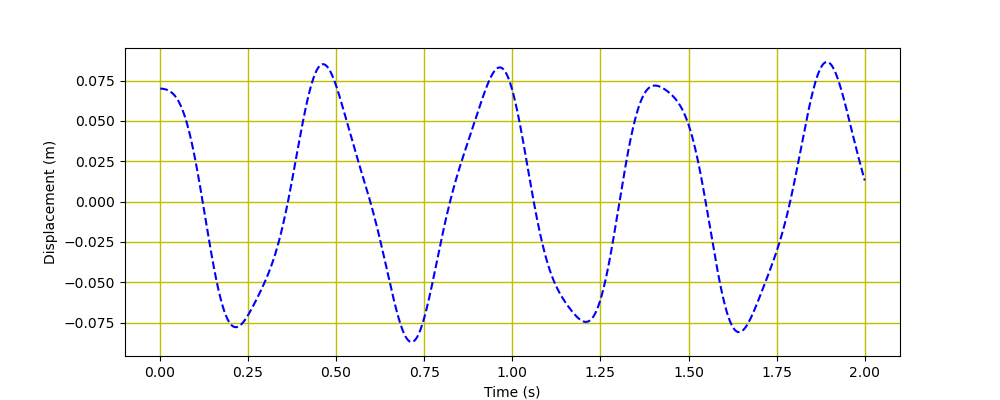

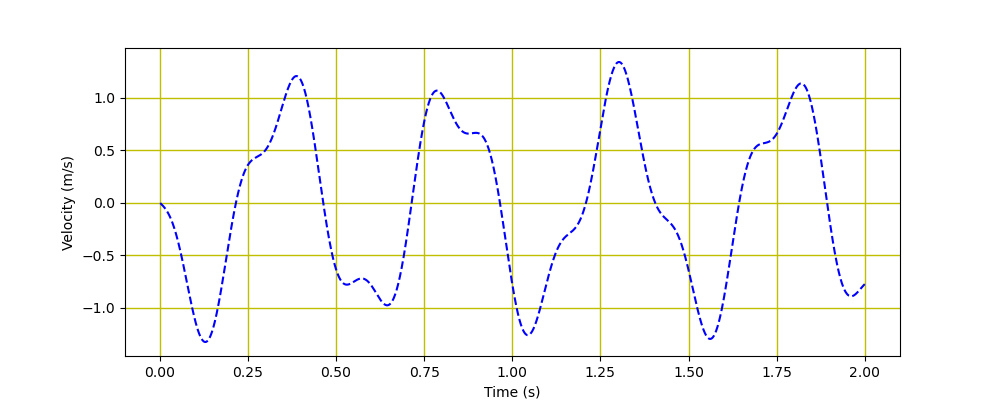

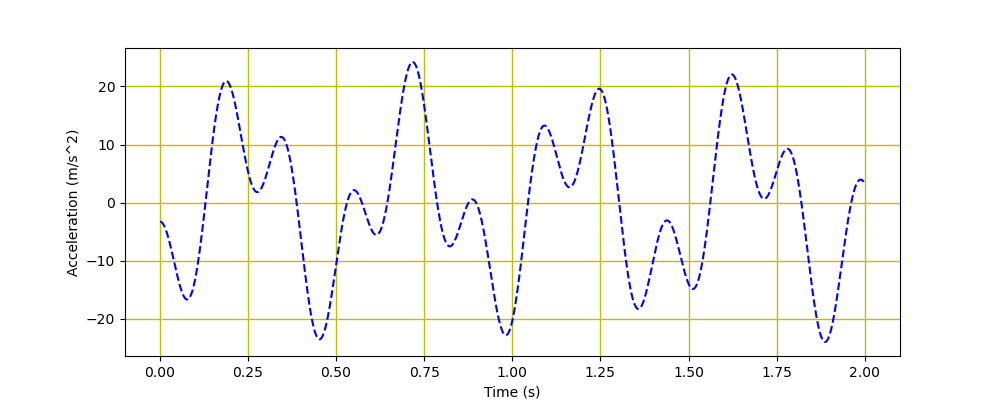

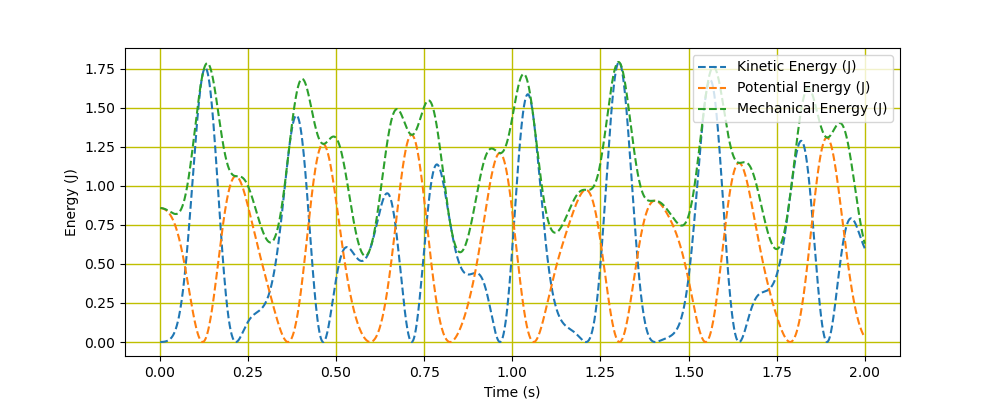

In [9]:
# Textbook Situation
solve_and_graph(mass=2, # kg 
                spring_constant=350, # N/m
                damping_constant=0, # kg/s
                initial_displacement=0.070, # m
                initial_velocity=0, # m/s
                time_step=0.001, # s
                stop_time=2, # s 
                applied_force=18, # N
                ang_freq=35) # rad/s

## Part B

Average Amplitude = 0.345 +/- 0.087 m
Ending Amplitude = 0.027 m
Last Max Amplitude = 0.428 m
Average Period = 0.450 +/- 0.002 s
Frequency = 2.222 Hz
Empirical Angular Frequency = 13.963 rad/s
Expected Angular Frequency = 13.229 rad/s
Initial Angular Frequency = 15.000 rad/s


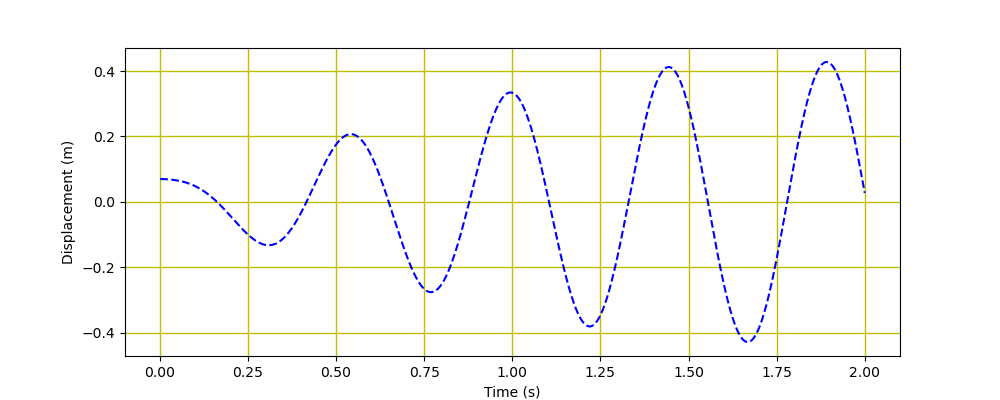

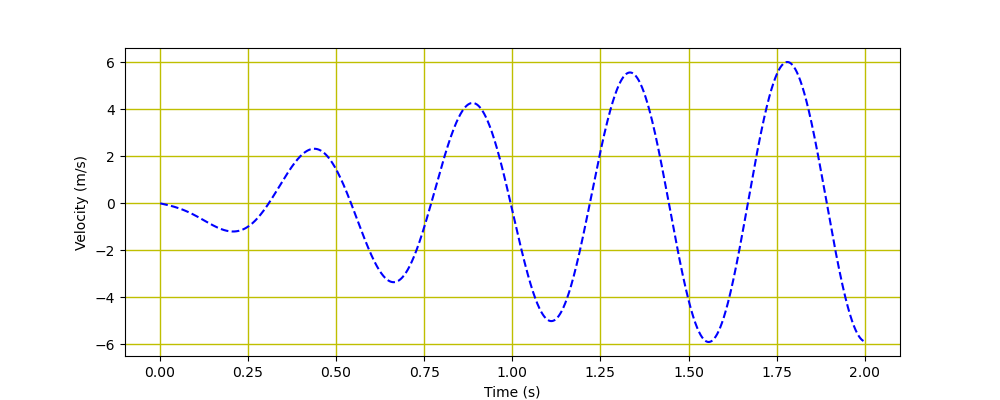

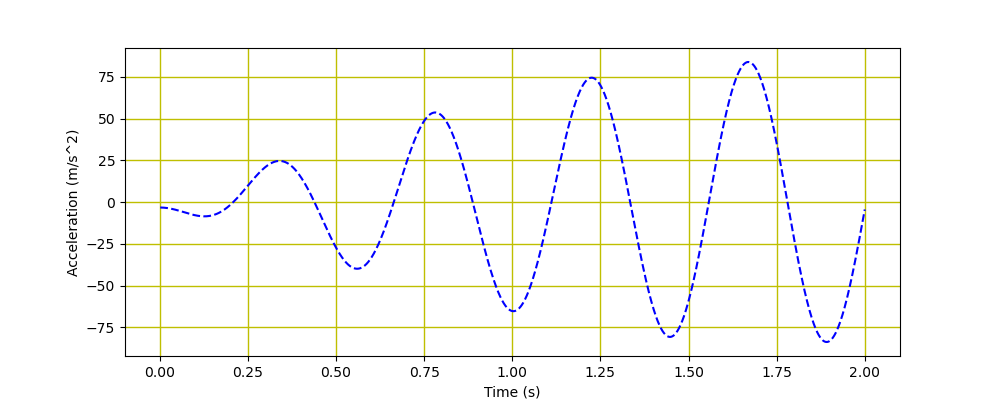

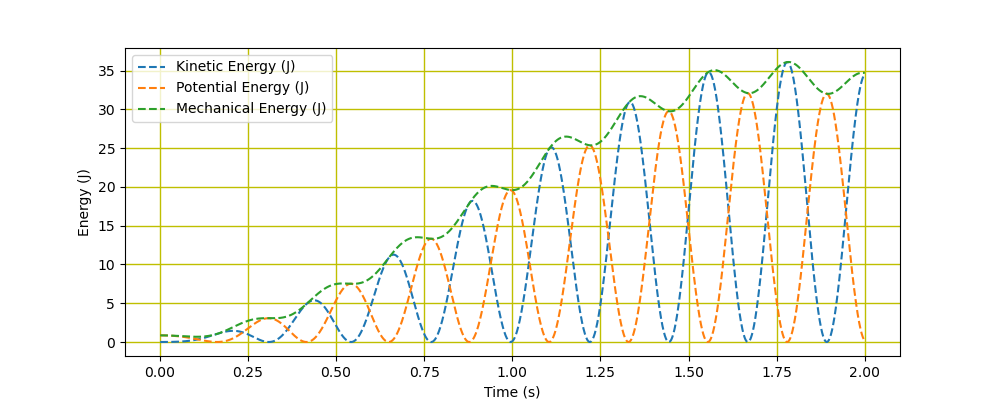

In [10]:
solve_and_graph(mass=2, # kg 
                spring_constant=350, # N/m
                damping_constant=0, # kg/s
                initial_displacement=0.070, # m
                initial_velocity=0, # m/s
                time_step=0.001, # s
                stop_time=2, # s 
                applied_force=18, # N
                ang_freq=15) # rad/s

## Part C

Average Amplitude = 0.006 +/- 0.010 m
Ending Amplitude = -0.003 m
Last Max Amplitude = 0.008 m
Average Period = 0.178 +/- 0.009 s
Frequency = 5.632 Hz
Empirical Angular Frequency = 35.387 rad/s
Expected Angular Frequency = 13.229 rad/s
Initial Angular Frequency = 35.000 rad/s


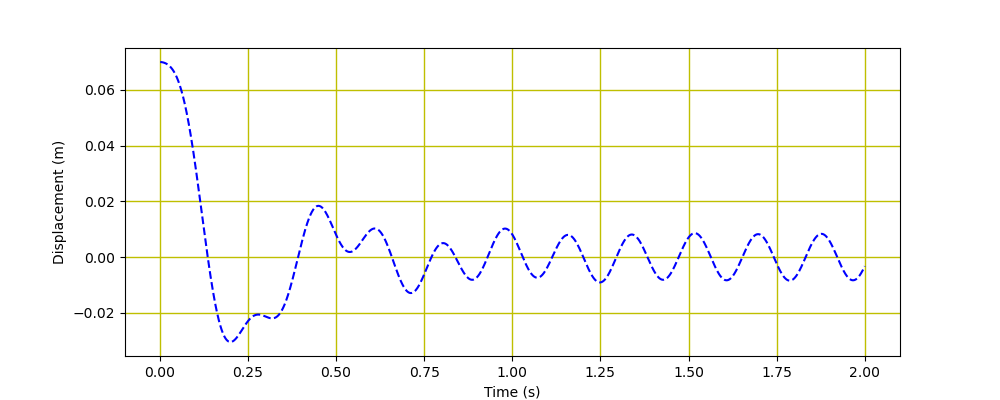

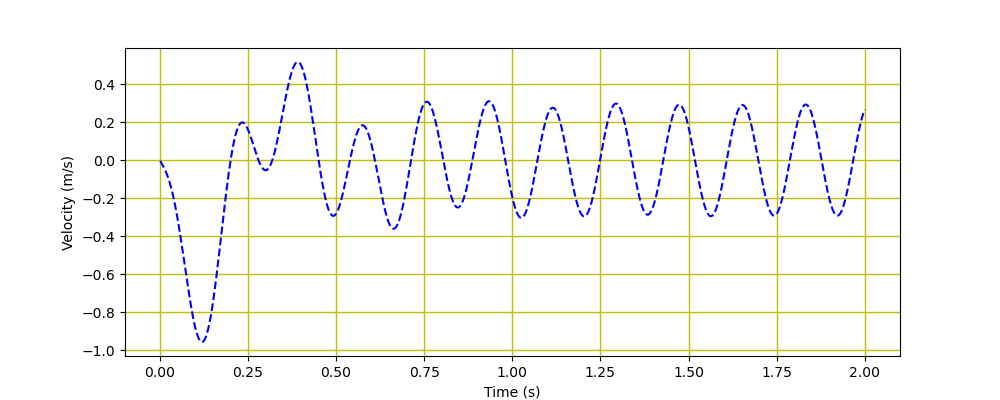

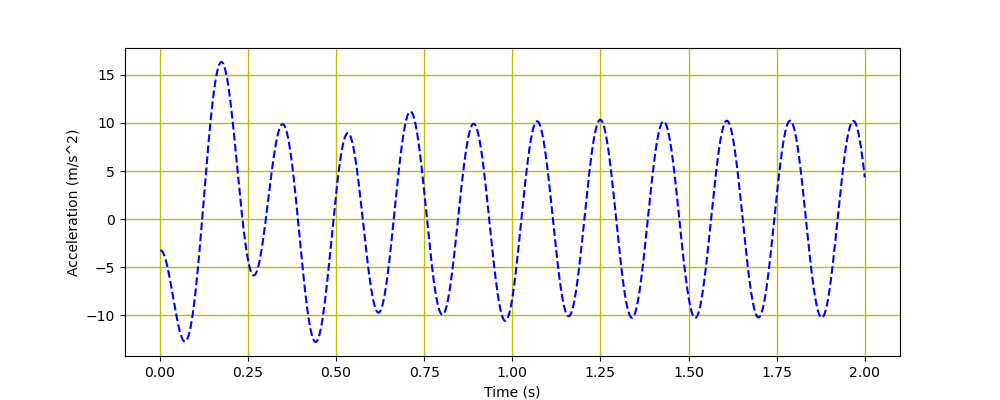

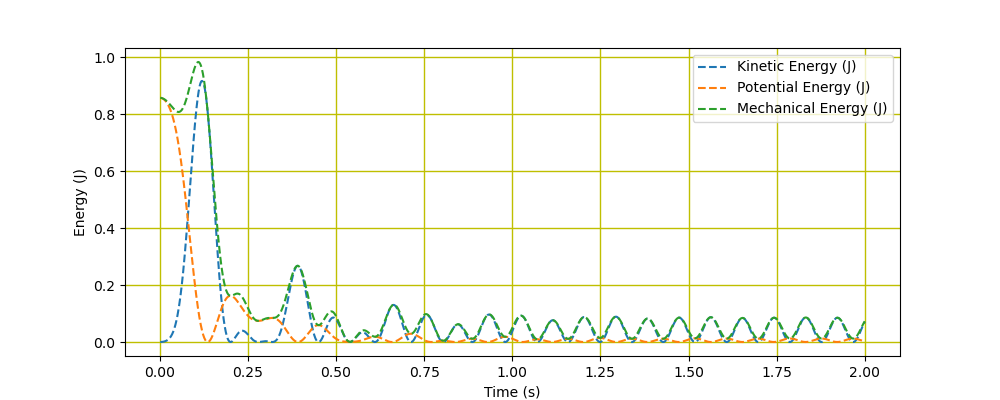

In [11]:
solve_and_graph(mass=2, # kg 
                spring_constant=350, # N/m
                damping_constant=15, # kg/s
                initial_displacement=0.070, # m
                initial_velocity=0, # m/s
                time_step=0.001, # s
                stop_time=2, # s 
                applied_force=18, # N
                ang_freq=35) # rad/s

## Part D

Average Amplitude = 0.076 +/- 0.003 m
Ending Amplitude = -0.071 m
Last Max Amplitude = 0.073 m
Average Period = 0.423 +/- 0.004 s
Frequency = 2.366 Hz
Empirical Angular Frequency = 14.866 rad/s
Expected Angular Frequency = 13.229 rad/s
Initial Angular Frequency = 15.000 rad/s


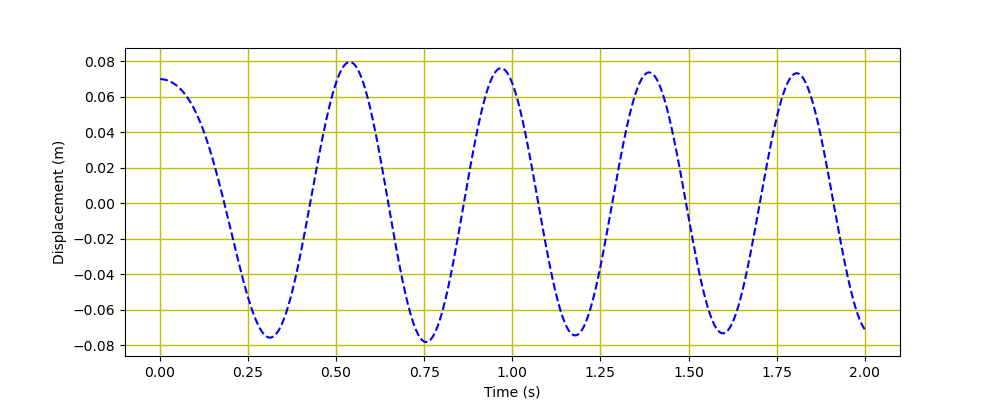

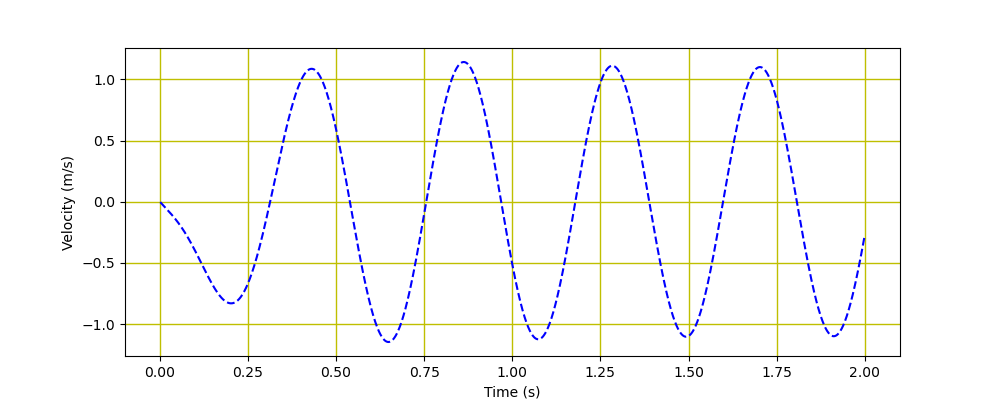

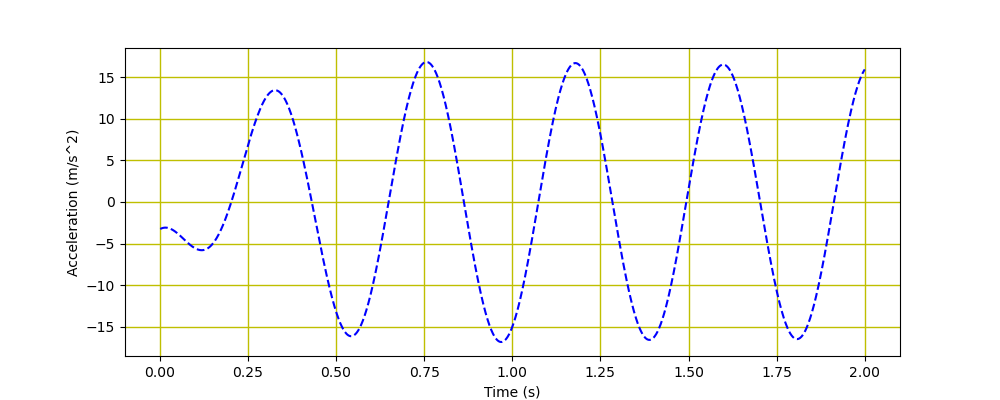

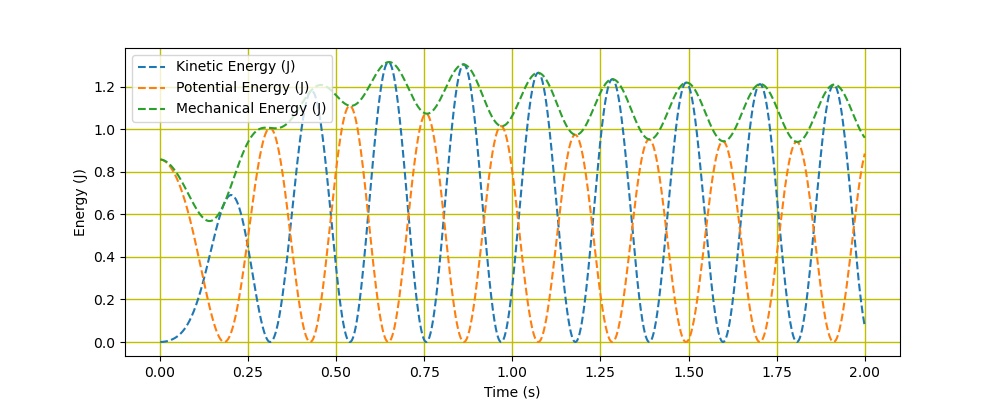

In [12]:
solve_and_graph(mass=2, # kg 
                spring_constant=350, # N/m
                damping_constant=15, # kg/s
                initial_displacement=0.070, # m
                initial_velocity=0, # m/s
                time_step=0.001, # s
                stop_time=2, # s 
                applied_force=18, # N
                ang_freq=15) # rad/s

(e) Highest is 